# First Assignment
## Image Processing
### 4th CSE 2020

Name : ريهام عصام الدين عبدالكريم التاجوري

ID : 1500607

Email : rehameltagoury@gmail.com


# 1 Medical Imaging
#### ( 4 marks)
Medical imaging is the procedure used to attain images of the body parts for medical uses in order to identify or study diseases. There are millions of imaging procedures done every week worldwide. Medical imaging is developing rapidly due to developments in image processing techniques including image recognition, analysis, and enhancement.

*as for this assignment we will be using image enhancement to detect tumors in brain.*

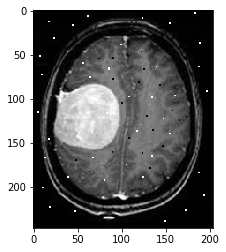

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('images/imagessaltandpeper.jpg')

plt.imshow(image)

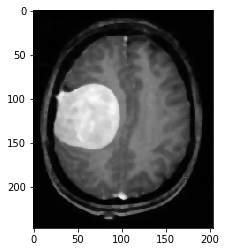

In [2]:
# TODO: use a proper spatial filter to remove the noise on the brain MR image ( 1 mark )
# Then display the result
img = cv2.medianBlur(image, 5)
plt.imshow(img)

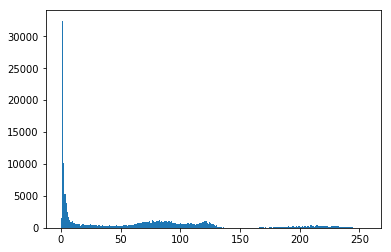

In [3]:
# TODO: Plot a histogram to see the place of the tumor ( 1 mark )
#plot the histogram of the picture
hist = cv2.calcHist([img],[0],None,[255],[0,255]) 
plt.hist(img.ravel(),255,[0,255]);
plt.show()

In [4]:
# TODO: Create a function to detect wether there is a tumor or no ( 2 marks )
# HINT: the histogram in the last cell will help you
def detection(img):
    status = "Tumor Not Detected"
    ## your code here ##
    
    #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray_img)
    #print(hist)
    #print(hist_full)
    
    #if the pixel is white then there is a tumor
    #print(img.shape)
    # looping the whole image and if we find a white pixel we will increase count by 1
    #normal person range 10 white pixels
    # if counter more than 10 then tumor will be detected
    count =0
    for i in range (200,255): #height of the image
                    #print(hist[i])
                    if hist[i]>10:
                         count +=1
                        
    if count>10:
         status="Tumor Detected"
    else:
         status="Tumor Not Detected"
    
    return status

In [5]:
status = detection(img) # you can change image name according to the filtered one

print(status)
## note: output should be for ex:"Tumor Detected" or "Tumor Not Detected"

Tumor Detected


# 2 Image Coloring
#### (1 mark)
Color is a powerful descriptor that often simplifies object identification and extraction from a scene. 

*In this part of the assignment you will practice on colored image*

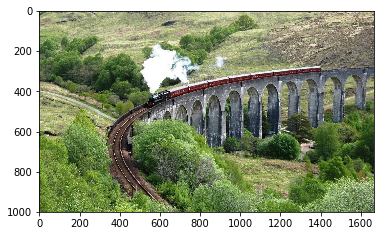

In [6]:
# Read in the image
image = mpimg.imread('images/HP_train.jpg')

plt.imshow(image)

(<matplotlib.axes._subplots.AxesSubplot at 0x10a41bb0>,
 <matplotlib.image.AxesImage at 0x1649f50>)

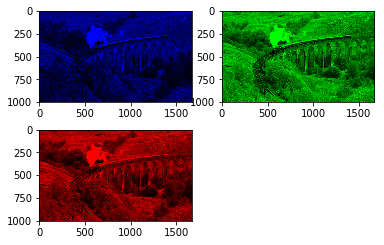

In [22]:
# TODO: Plot the image in its 3 channels (R & G & B)
#B,G,R=cv2.split(image) #another method for splitting
img_blue=np.copy(image)
img_blue[:,:,0]=0
img_blue[:,:,1]=1
plt.subplot(221),plt.imshow(img_blue)
img_g=np.copy(image)
img_g[:,:,0]=0
img_g[:,:,2]=1
plt.subplot(222),plt.imshow(img_g) 
img_red=np.copy(image)
img_red[:,:,1]=0
img_red[:,:,2]=1
plt.subplot(223),plt.imshow(img_red) 



## BONUS
#### ( 1 bonus mark )

You need to remove the green screen behind Ron's car and insert it to fly above the train to reach Hogwarts!

Image dimensions: (938, 1500, 3)


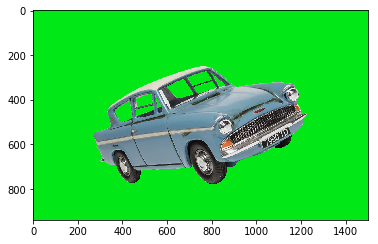

In [28]:
# Read in the image
image = mpimg.imread('images/HP_Green.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

# Display the image
plt.imshow(image)

### Define the color threshold

In [29]:
## TODO: Define our color selection boundaries in RGB values "change those numbers"
lower_green = np.array([0,232,22]) 
upper_green = np.array([255,255,255])

### Create a mask

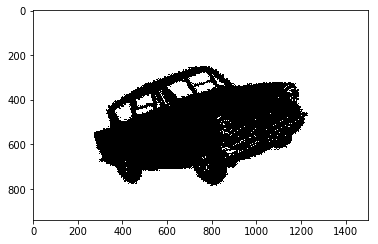

In [30]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

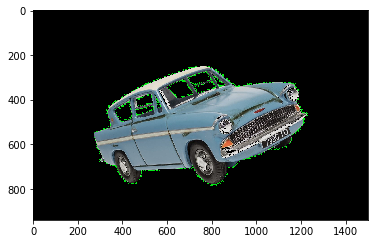

In [31]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)
#print(masked_image.shape)

### Mask and add a background image

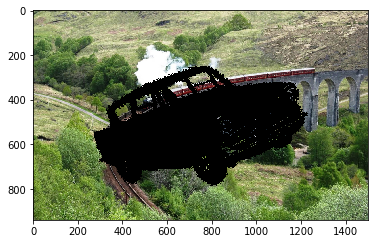

In [32]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/HP_train.jpg')
#print(background_image.shape)
## TODO: Crop it or resize the background to be the right size (938x1500)
dimen= (1500,938)
resized_img=cv2.resize(background_image,dimen)
#print(image.shape)
#plt.imshow(background_image)

## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image

cv2.bitwise_not(mask)
maskedimage = np.copy(resized_img)

maskedimage[mask == 0] = [0, 0, 0]

# Display it!
plt.imshow(maskedimage)

## TODO: Display the background and make sure
#plt.imshow(masked_image,cmap='gray')
#plt.imshow(masked_imae)

### Create a complete image

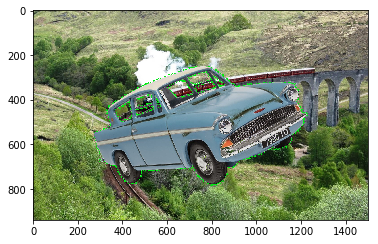

In [33]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background
complete_image=masked_image+maskedimage
#print(masked_image.shape)
#print(resized_img.shape)
plt.imshow(complete_image)

# Congratulations! You have finished your first assignment